In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline

In [5]:
# https://en.wikipedia.org/wiki/Beta_distribution

# Parameters:
eta = 0.5
teta = 0.5

In [6]:
distribution = sts.beta(eta, teta)

# A sample of size 1000:
sample = distribution.rvs(1000)

x = np.linspace(0, 1, 1000)
pdf = distribution.pdf(x)

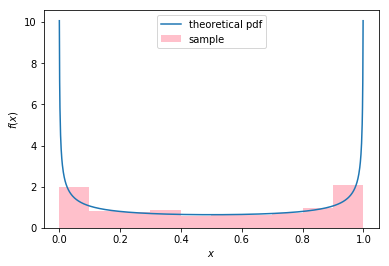

In [7]:
# A histogram that visualizes the sample:
plt.hist(sample, density=True, color='pink', label='sample')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Theoretical PDF:
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()

In [8]:
def beta_mean(x, y):
    """Returns the mean of a Beta distribution"""
    return x / (x+y)

def beta_variance(x, y):
    """Returns the variance of a Beta distribution"""
    return x * y / ((x+y)**2 * (x+y+1)) 

In [9]:
def sample_means(sample_size, number_of_samples=1000):
    """Returns an array of sample means"""
    
    sample_means = np.array(1000)

    data = distribution.rvs((number_of_samples, sample_size))
    sample_means = data.mean(axis=-1)
    
    return sample_means

In [10]:
def clt_diy(sample_size):
    """Draws a histogram that visualizes the sampling distribution, and also the normal distribution PDF"""
    
    sample_means_arr = sample_means(sample_size)
    
    # A histogram that visualizes the sampling distribution:
    plt.hist(sample_means_arr, normed=True, color='pink', label='sampling distribution')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend()

    # The normal distribution PDF
    norm = sts.norm(beta_mean(eta, teta), np.sqrt(beta_variance(eta, teta) / sample_size))
    plt.plot(x, norm.pdf(x), label='beta pdf')
    plt.legend()

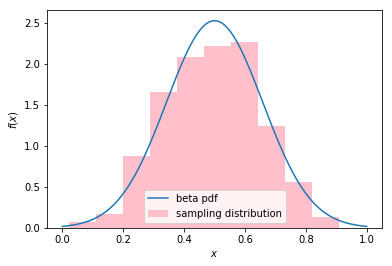

In [11]:
clt_diy(5)

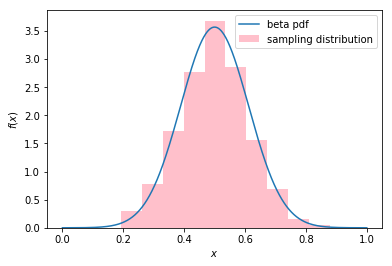

In [12]:
clt_diy(10)

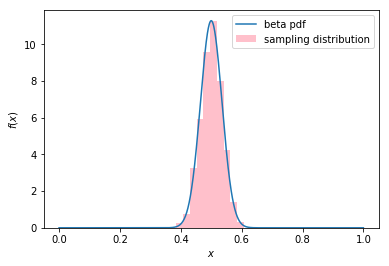

In [13]:
clt_diy(100)